In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge


In [2]:
# Loading DataSet
df = pd.read_csv(r"D:\Studies\DataScience\DataTrained\DataTrained_Classes\FlipRobo\FlipRobo2\ProjectEvaluation\Phase1\baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# EDA - Exploratory Data Analysis

In [7]:
# #checking the shape of datase
df.shape

(30, 17)

In [10]:
# checking columns in Dataset
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [11]:
# checking duplicate values in the dataset
df.duplicated().sum()

0

In [12]:
# checking null values in the dataset
df.isnull().sum().sum()

0

<Axes: >

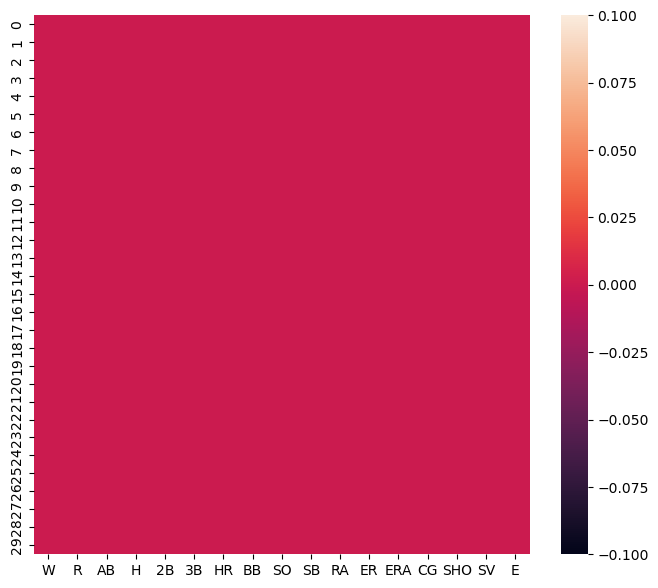

In [13]:
# lets plot heatmap for null values 
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull())

In [14]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Observations 
1.The DataFrame contains 30 entries, which implies there are 30 rows of data.

2.There are 17 columns in the DataFrame, each representing a different attribute or feature.

3.The columns have the following meanings:


    W: Number of wins.
    R: Number of runs scored.
    AB: Number of at-bats.
    H: Number of hits.
    2B: Number of doubles.
    3B: Number of triples.
    HR: Number of home runs.
    BB: Number of walks (base on balls).
    SO: Number of strikeouts.
    SB: Number of stolen bases.
    RA: Number of runs allowed.
    ER: Number of earned runs allowed.
    ERA: Earned Run Average (a statistical measure of a pitcher's effectiveness).
    CG: Number of complete games.
    SHO: Number of shutouts.
    SV: Number of saves.
    E: Number of errors.


- All the columns contain numerical data, with 'int64' data type, except for the 'ERA' column, which contains floating-point numbers.

- There seem to be no missing values (non-null count is 30 for all columns).

- The dataset appears to be related to baseball statistics, and it likely represents the performance of different baseball   teams or players during a certain period.

- The 'W' column represent the target variable (number of wins), while the other columns are potential predictors or         features that could be used to analyze and predict the number of wins or other performance-related metrics.


In [15]:
# lets Describe the Dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [16]:
#Checking unique values of each columns
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

# observations
- CG and SHO has lower unique values indicating possibility of limited variability .
- Also W, R, AB, H , BB, SO, and SB has high unique values means more diversity .



In [17]:
#Checking value counts of target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [18]:
#checking skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Visualization

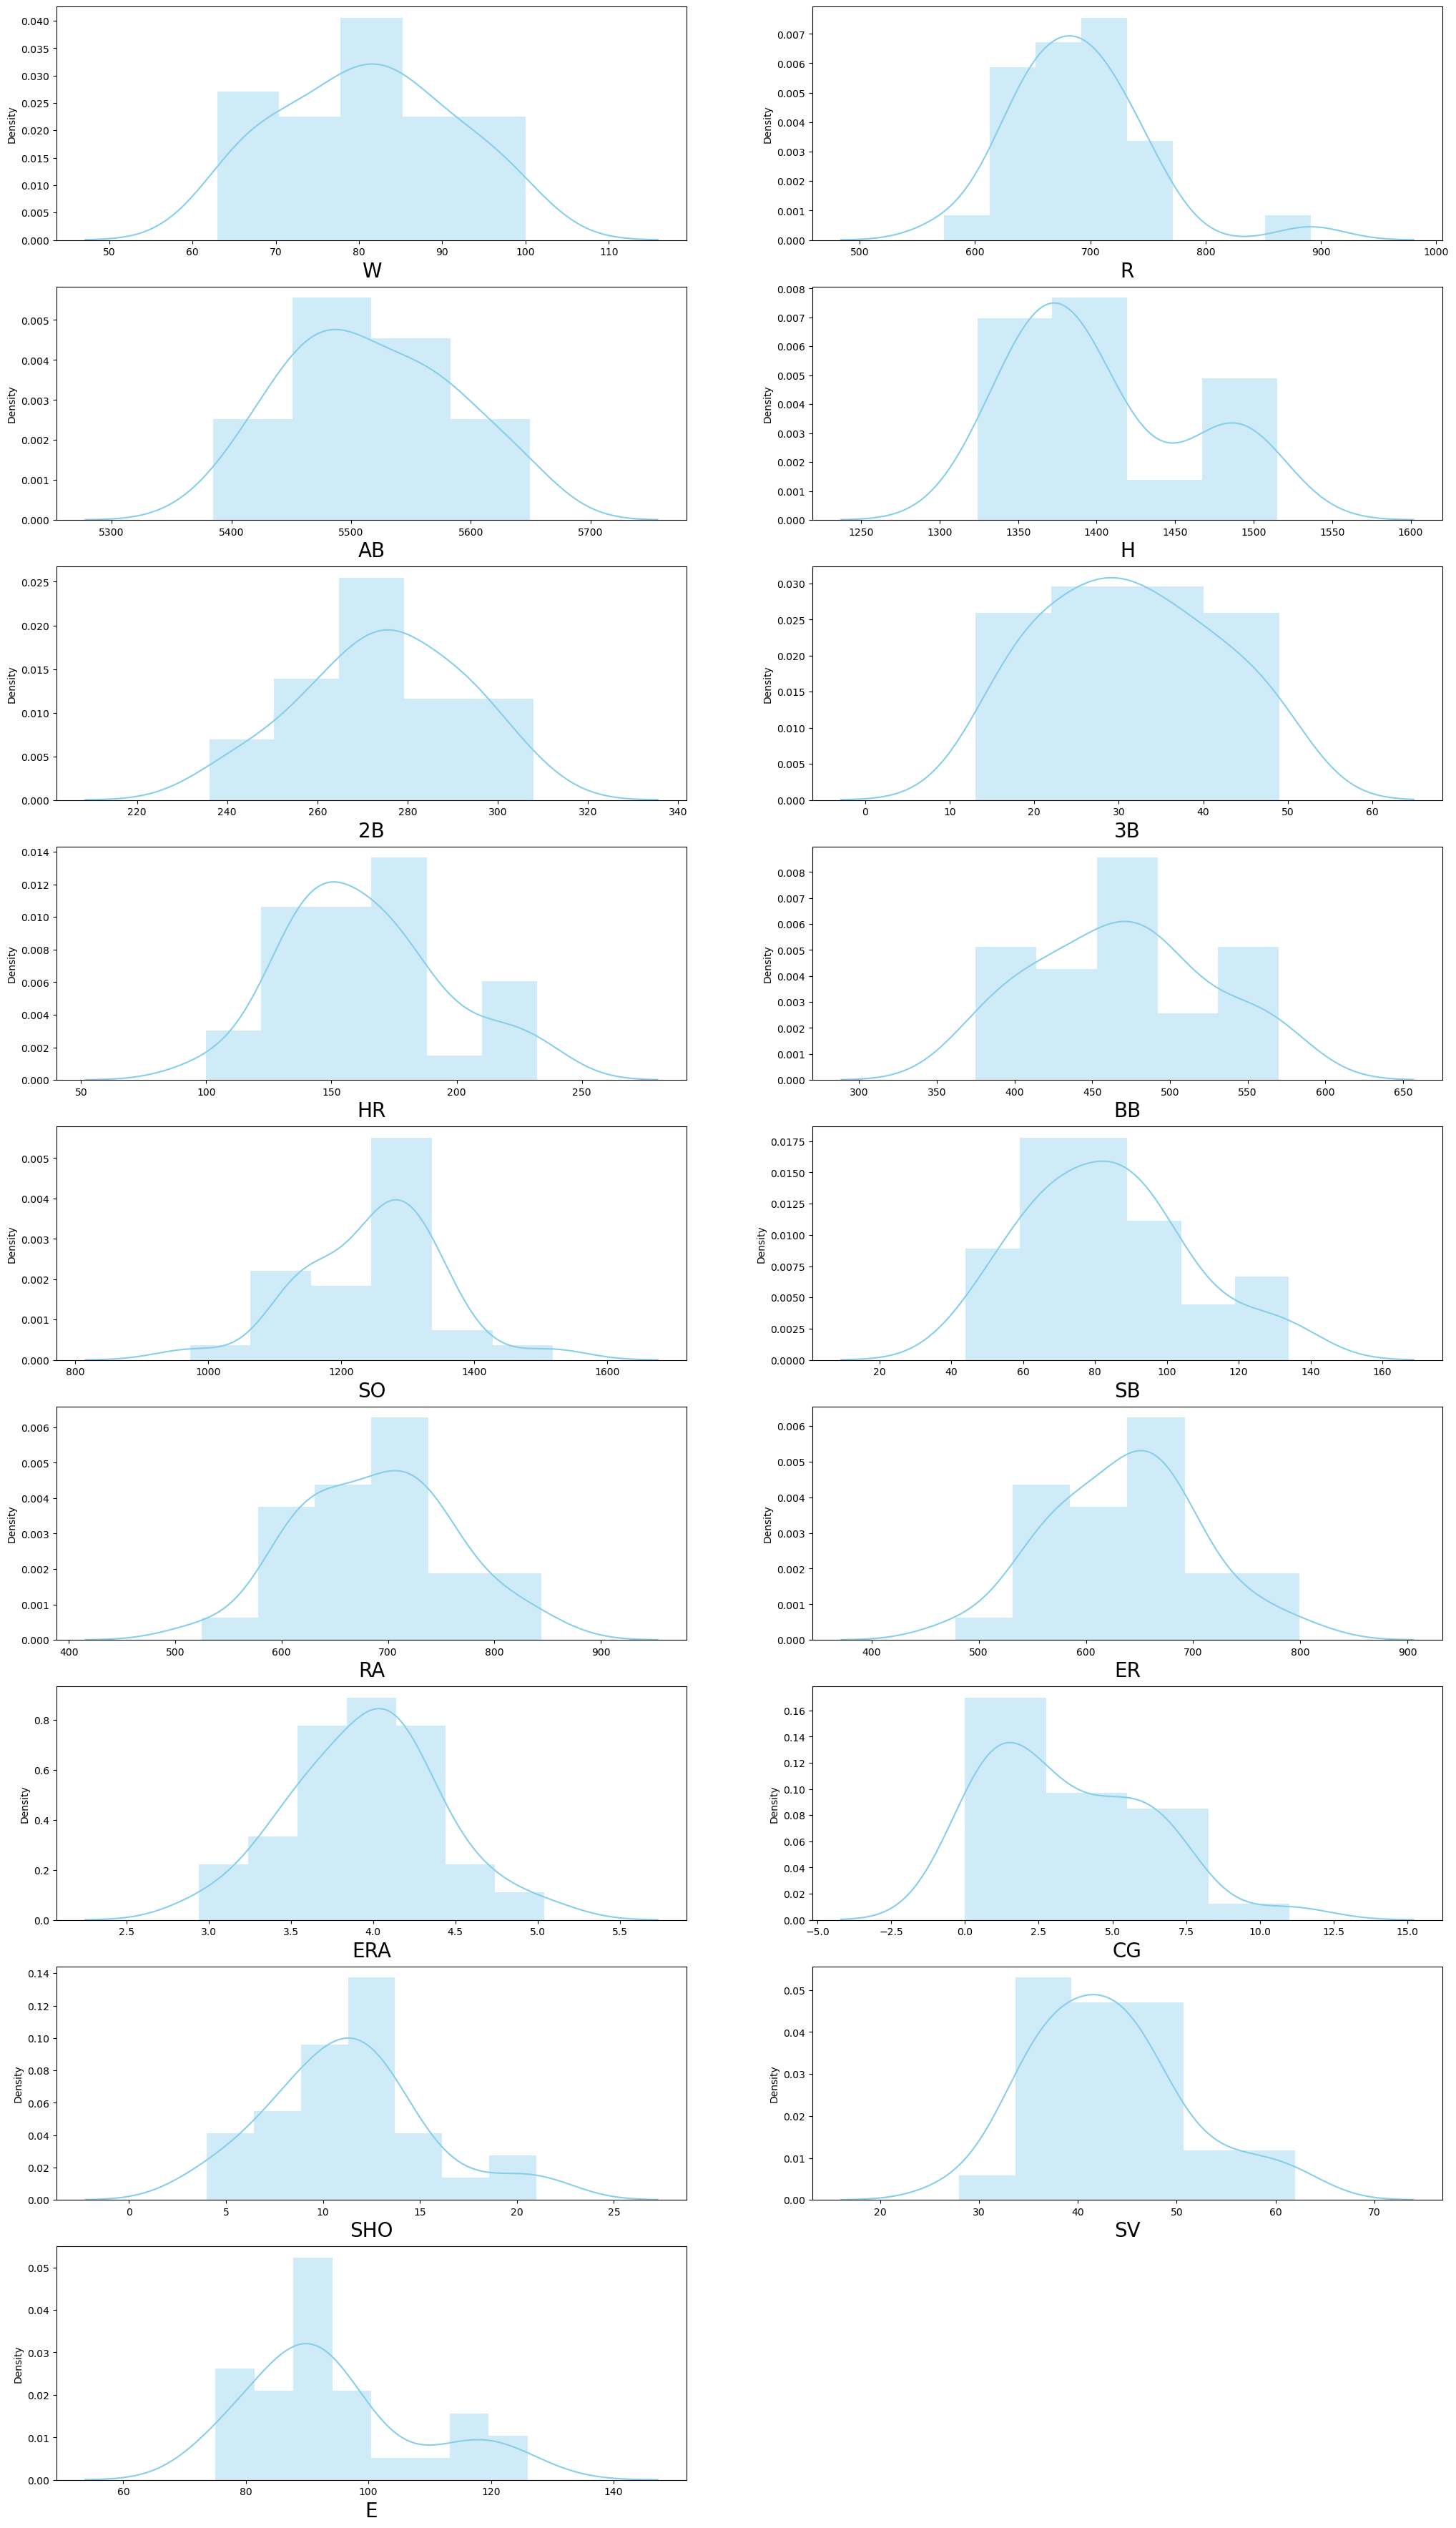

In [19]:
# lets check the distribution
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

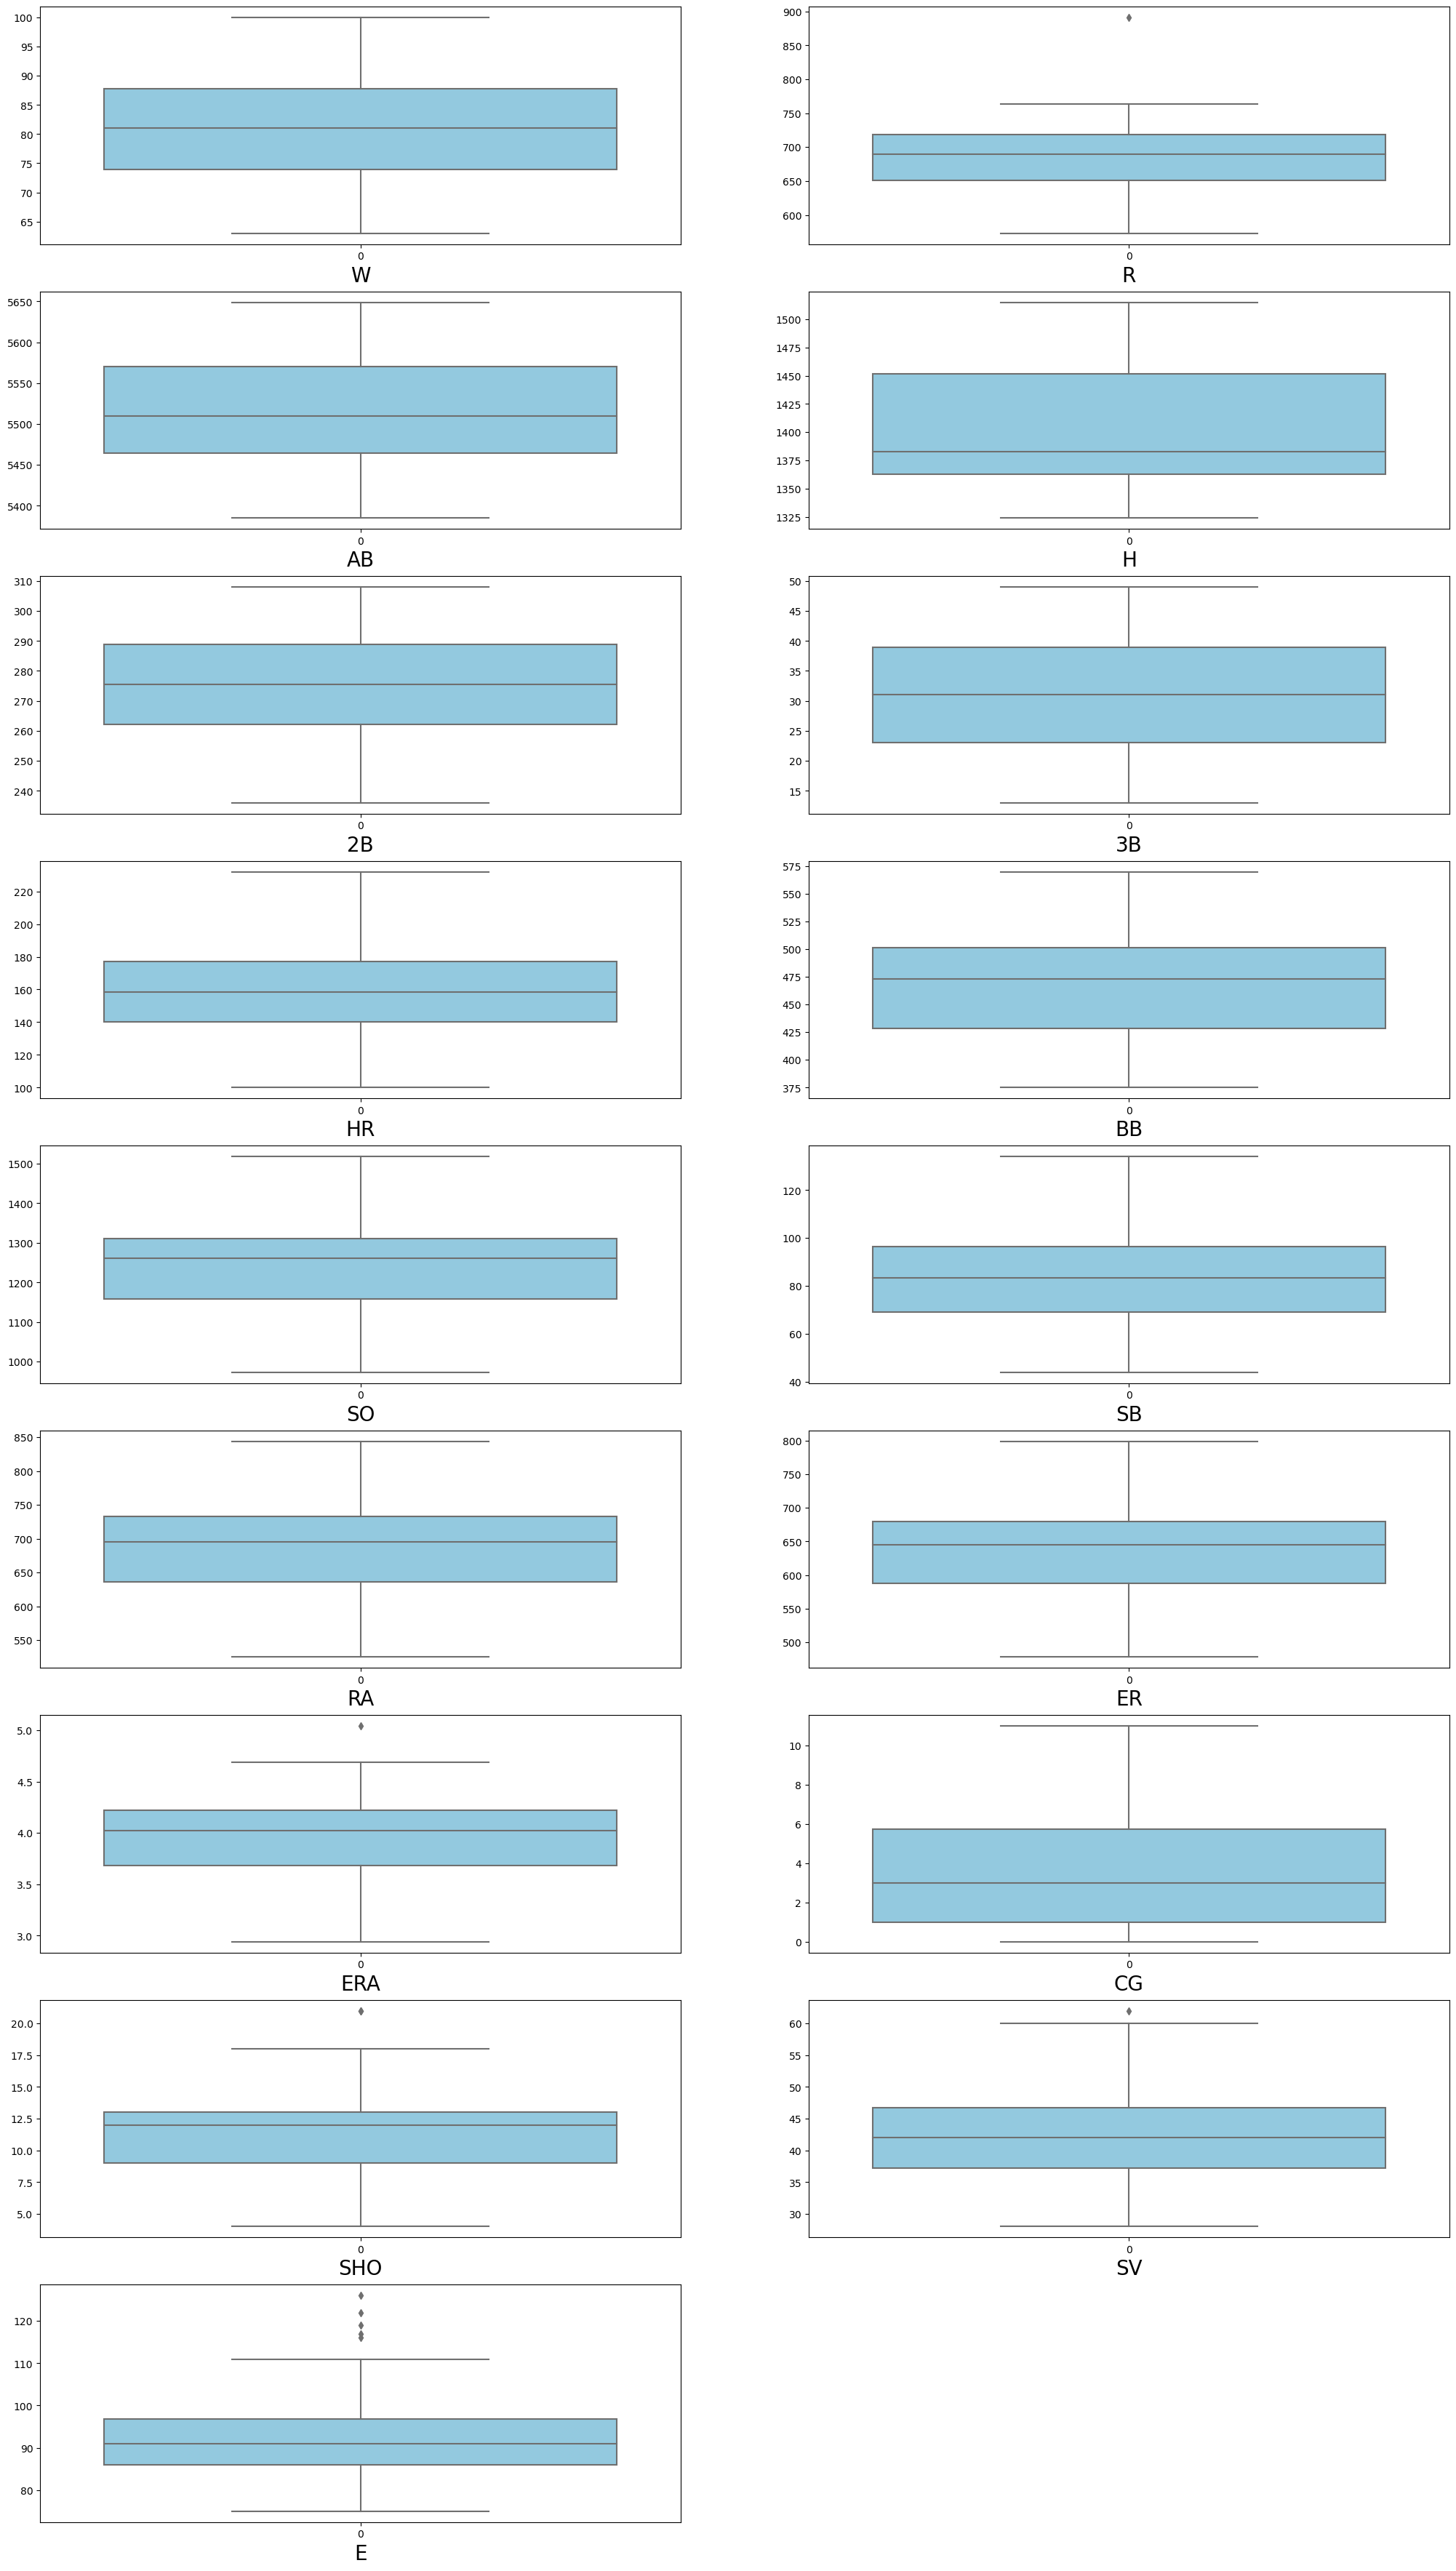

In [20]:
# Lets check the outliers 
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

# observations 
- There are some outliers in R, ERA, SHO, SV,E  , will try to remove these in further steps

<Figure size 2500x2000 with 0 Axes>

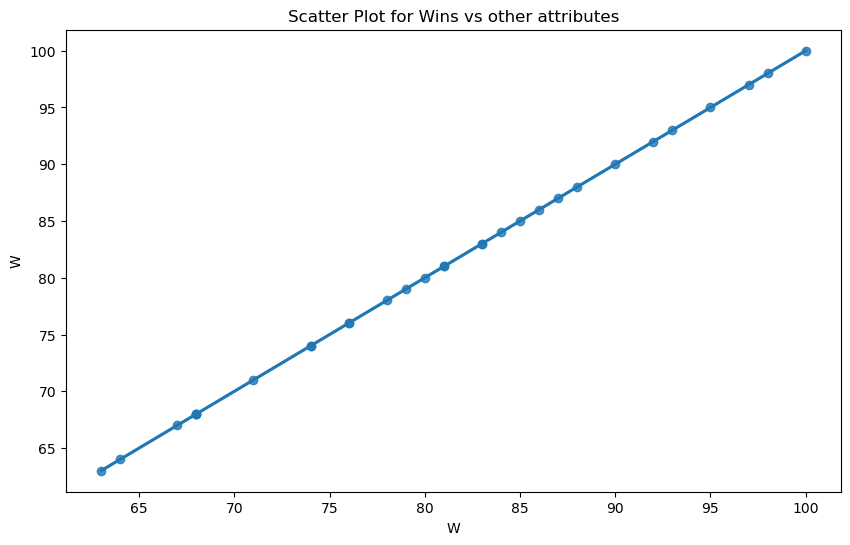

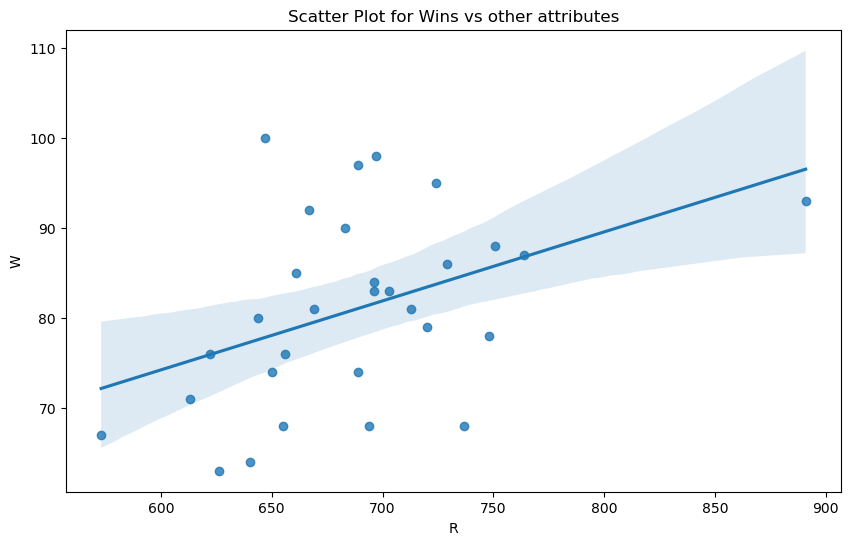

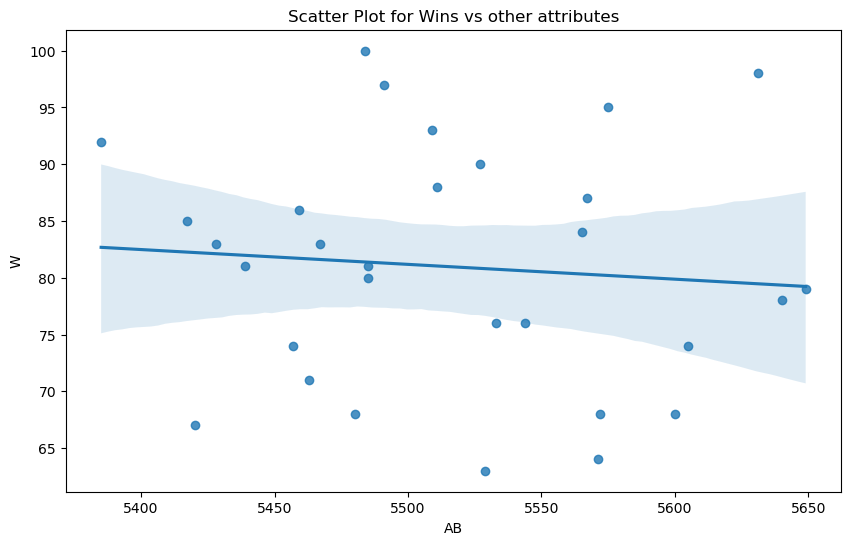

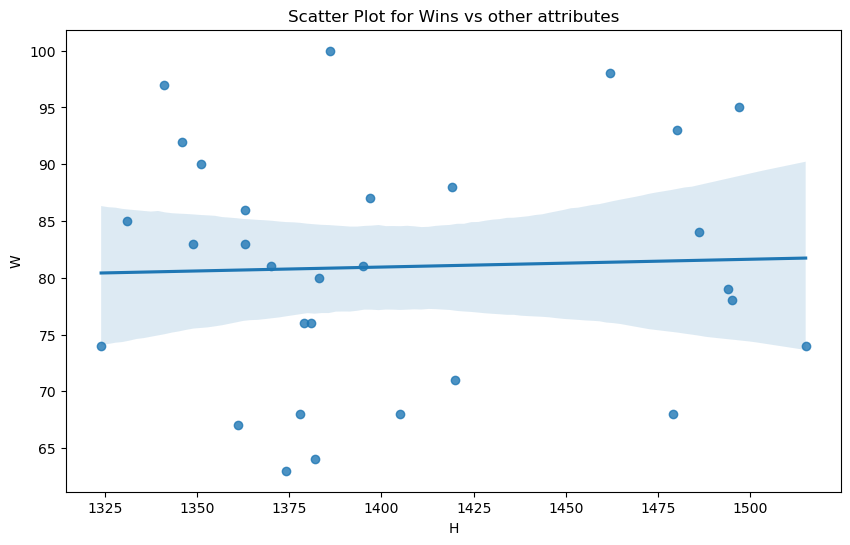

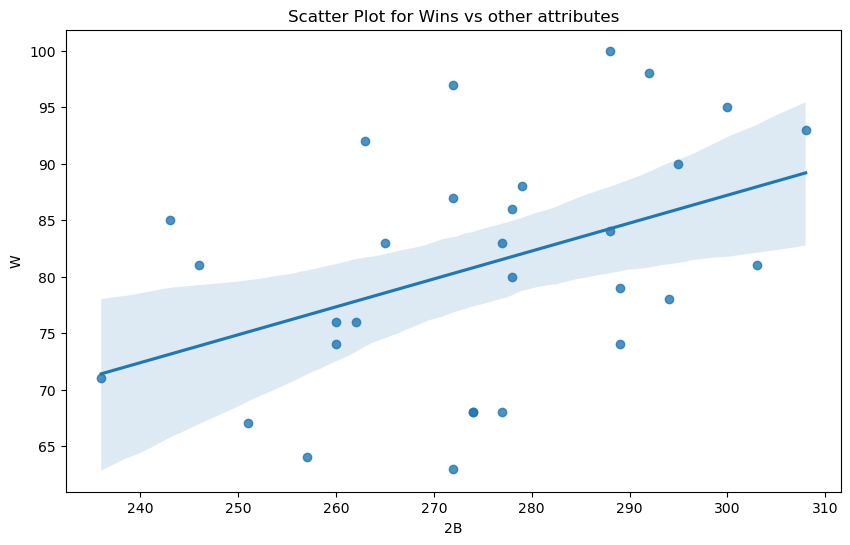

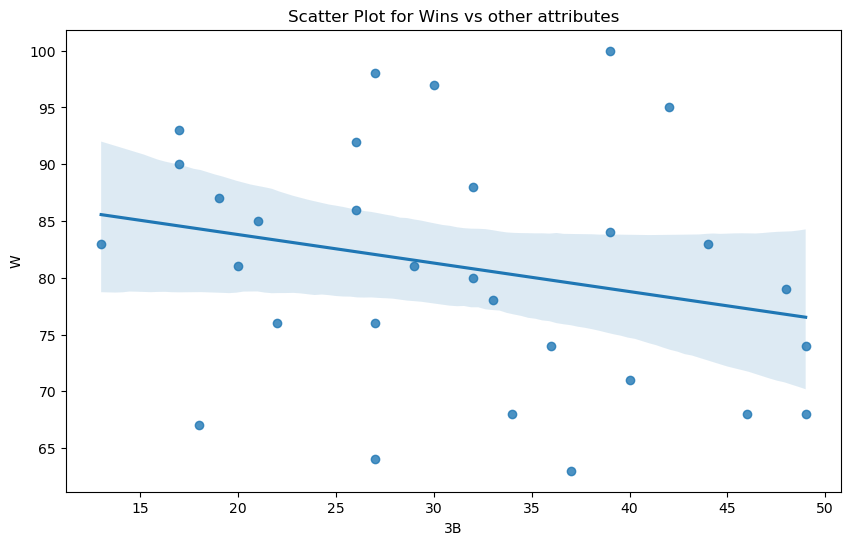

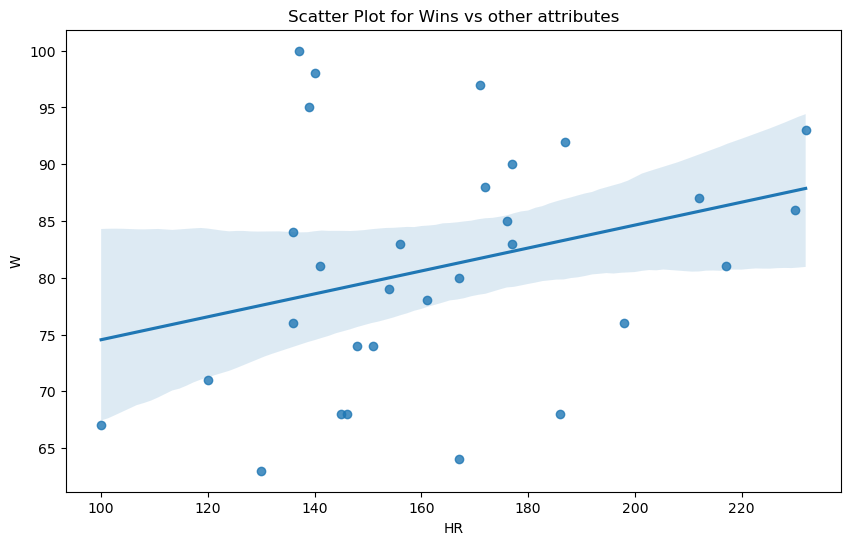

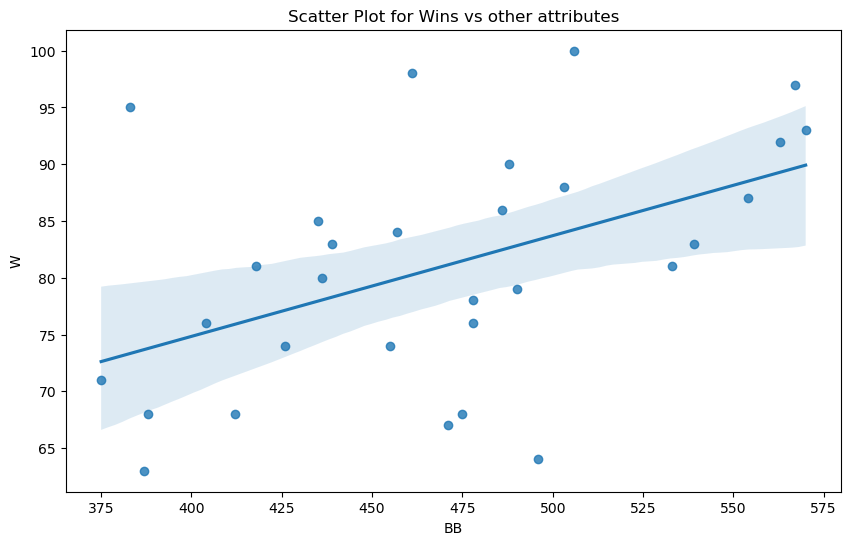

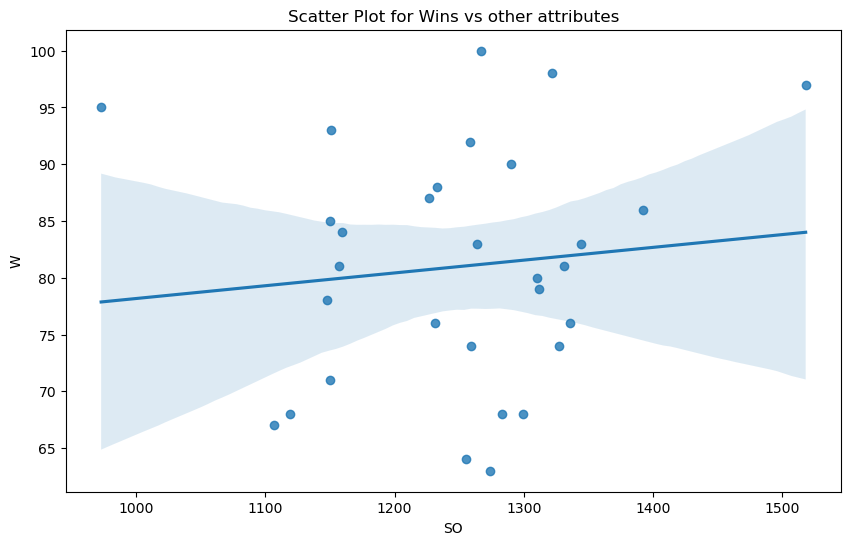

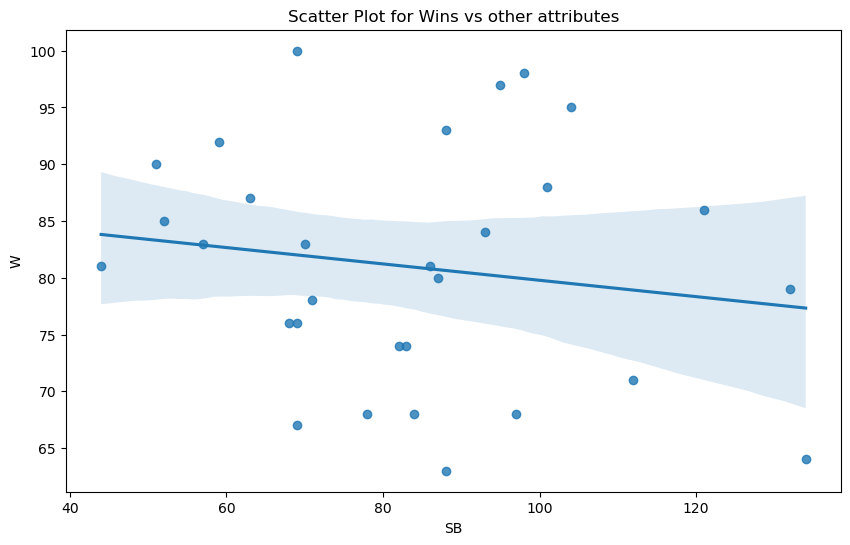

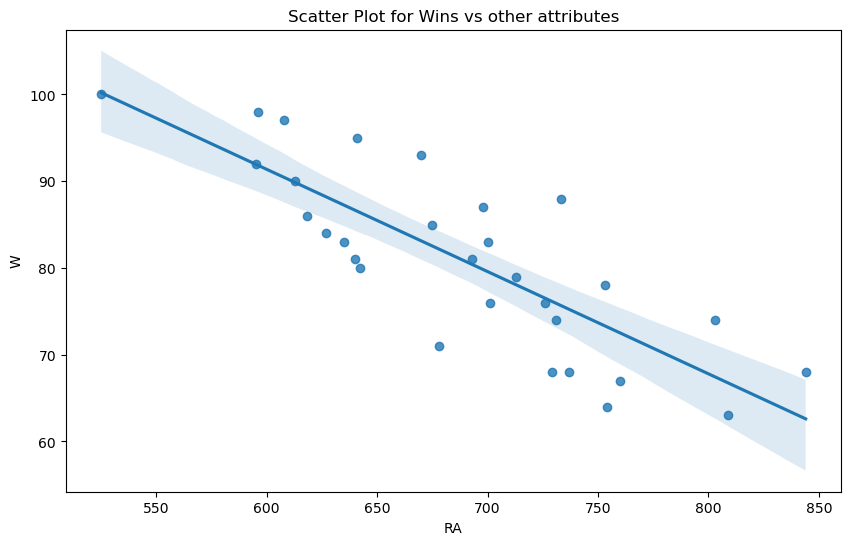

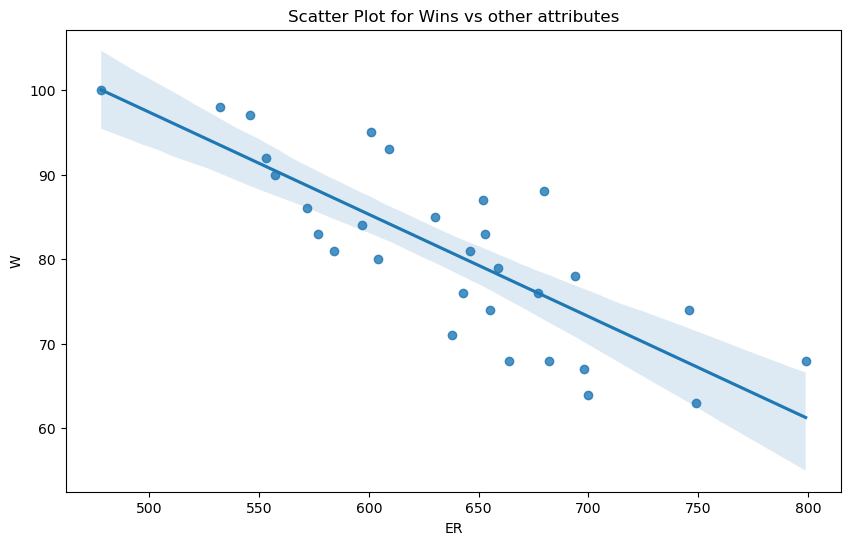

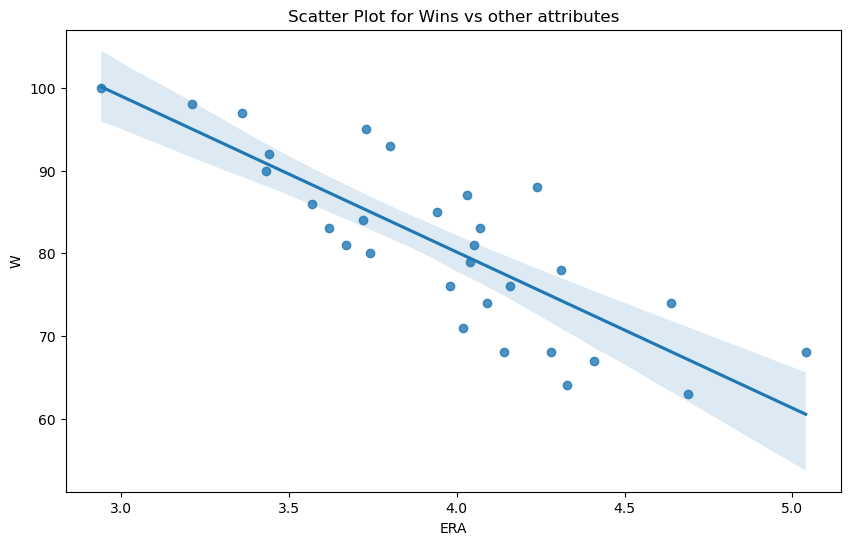

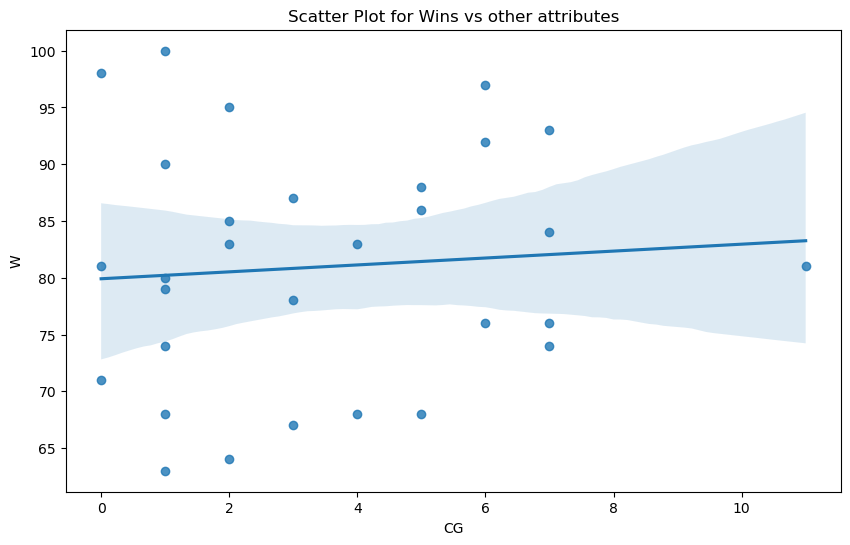

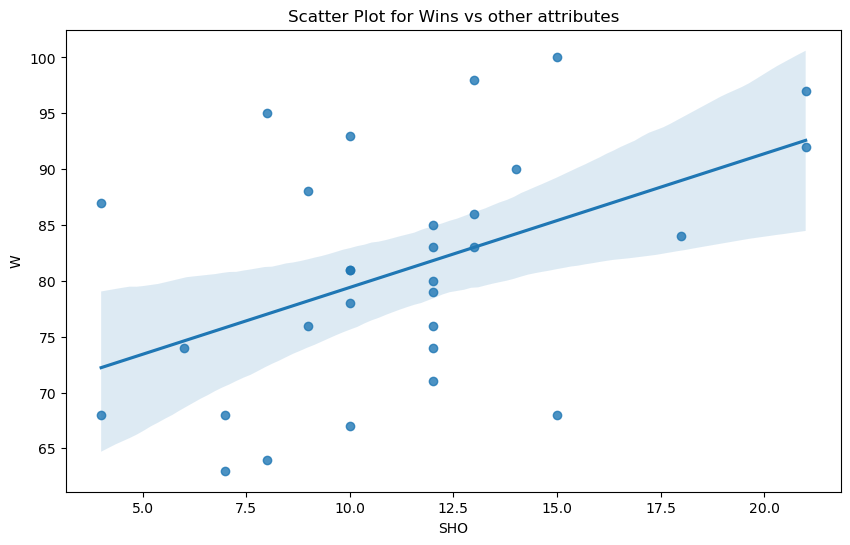

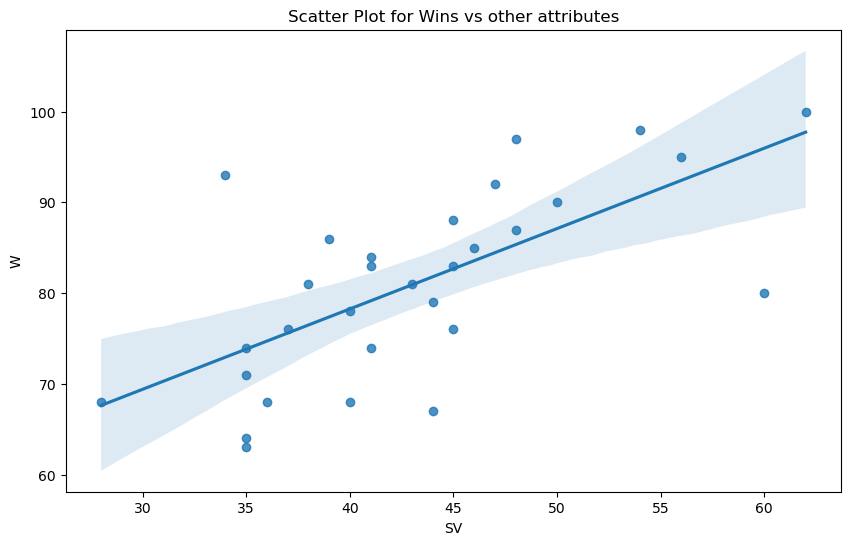

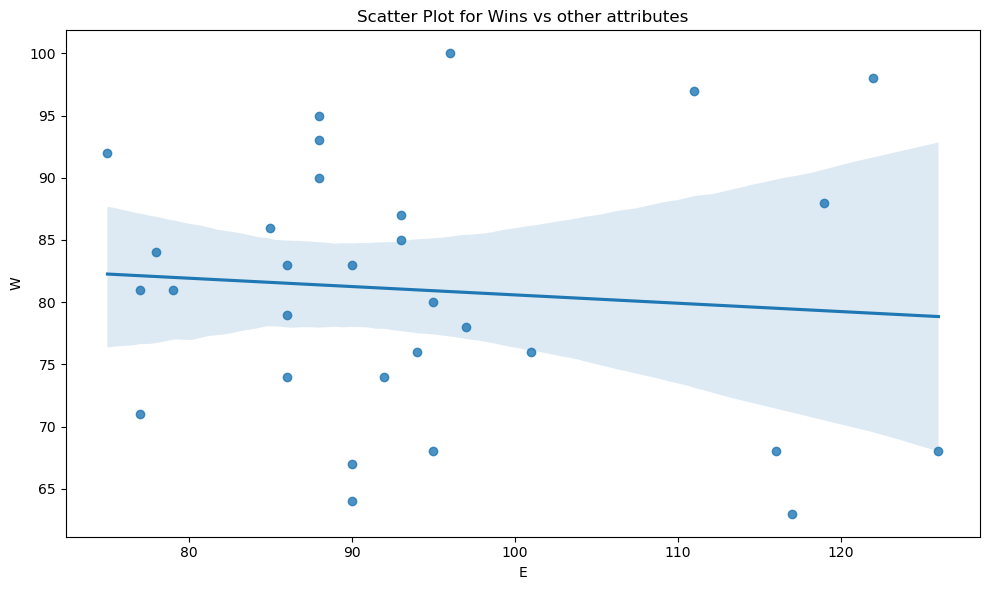

In [21]:
# lets plot the Regplot
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(x=df[column], y=df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')

plt.tight_layout()

# Observation 
- Imp observation that RA,ER, ERA has good relation with Win.
- Other columns does not have good relationship with Win as data is scattered across all places 

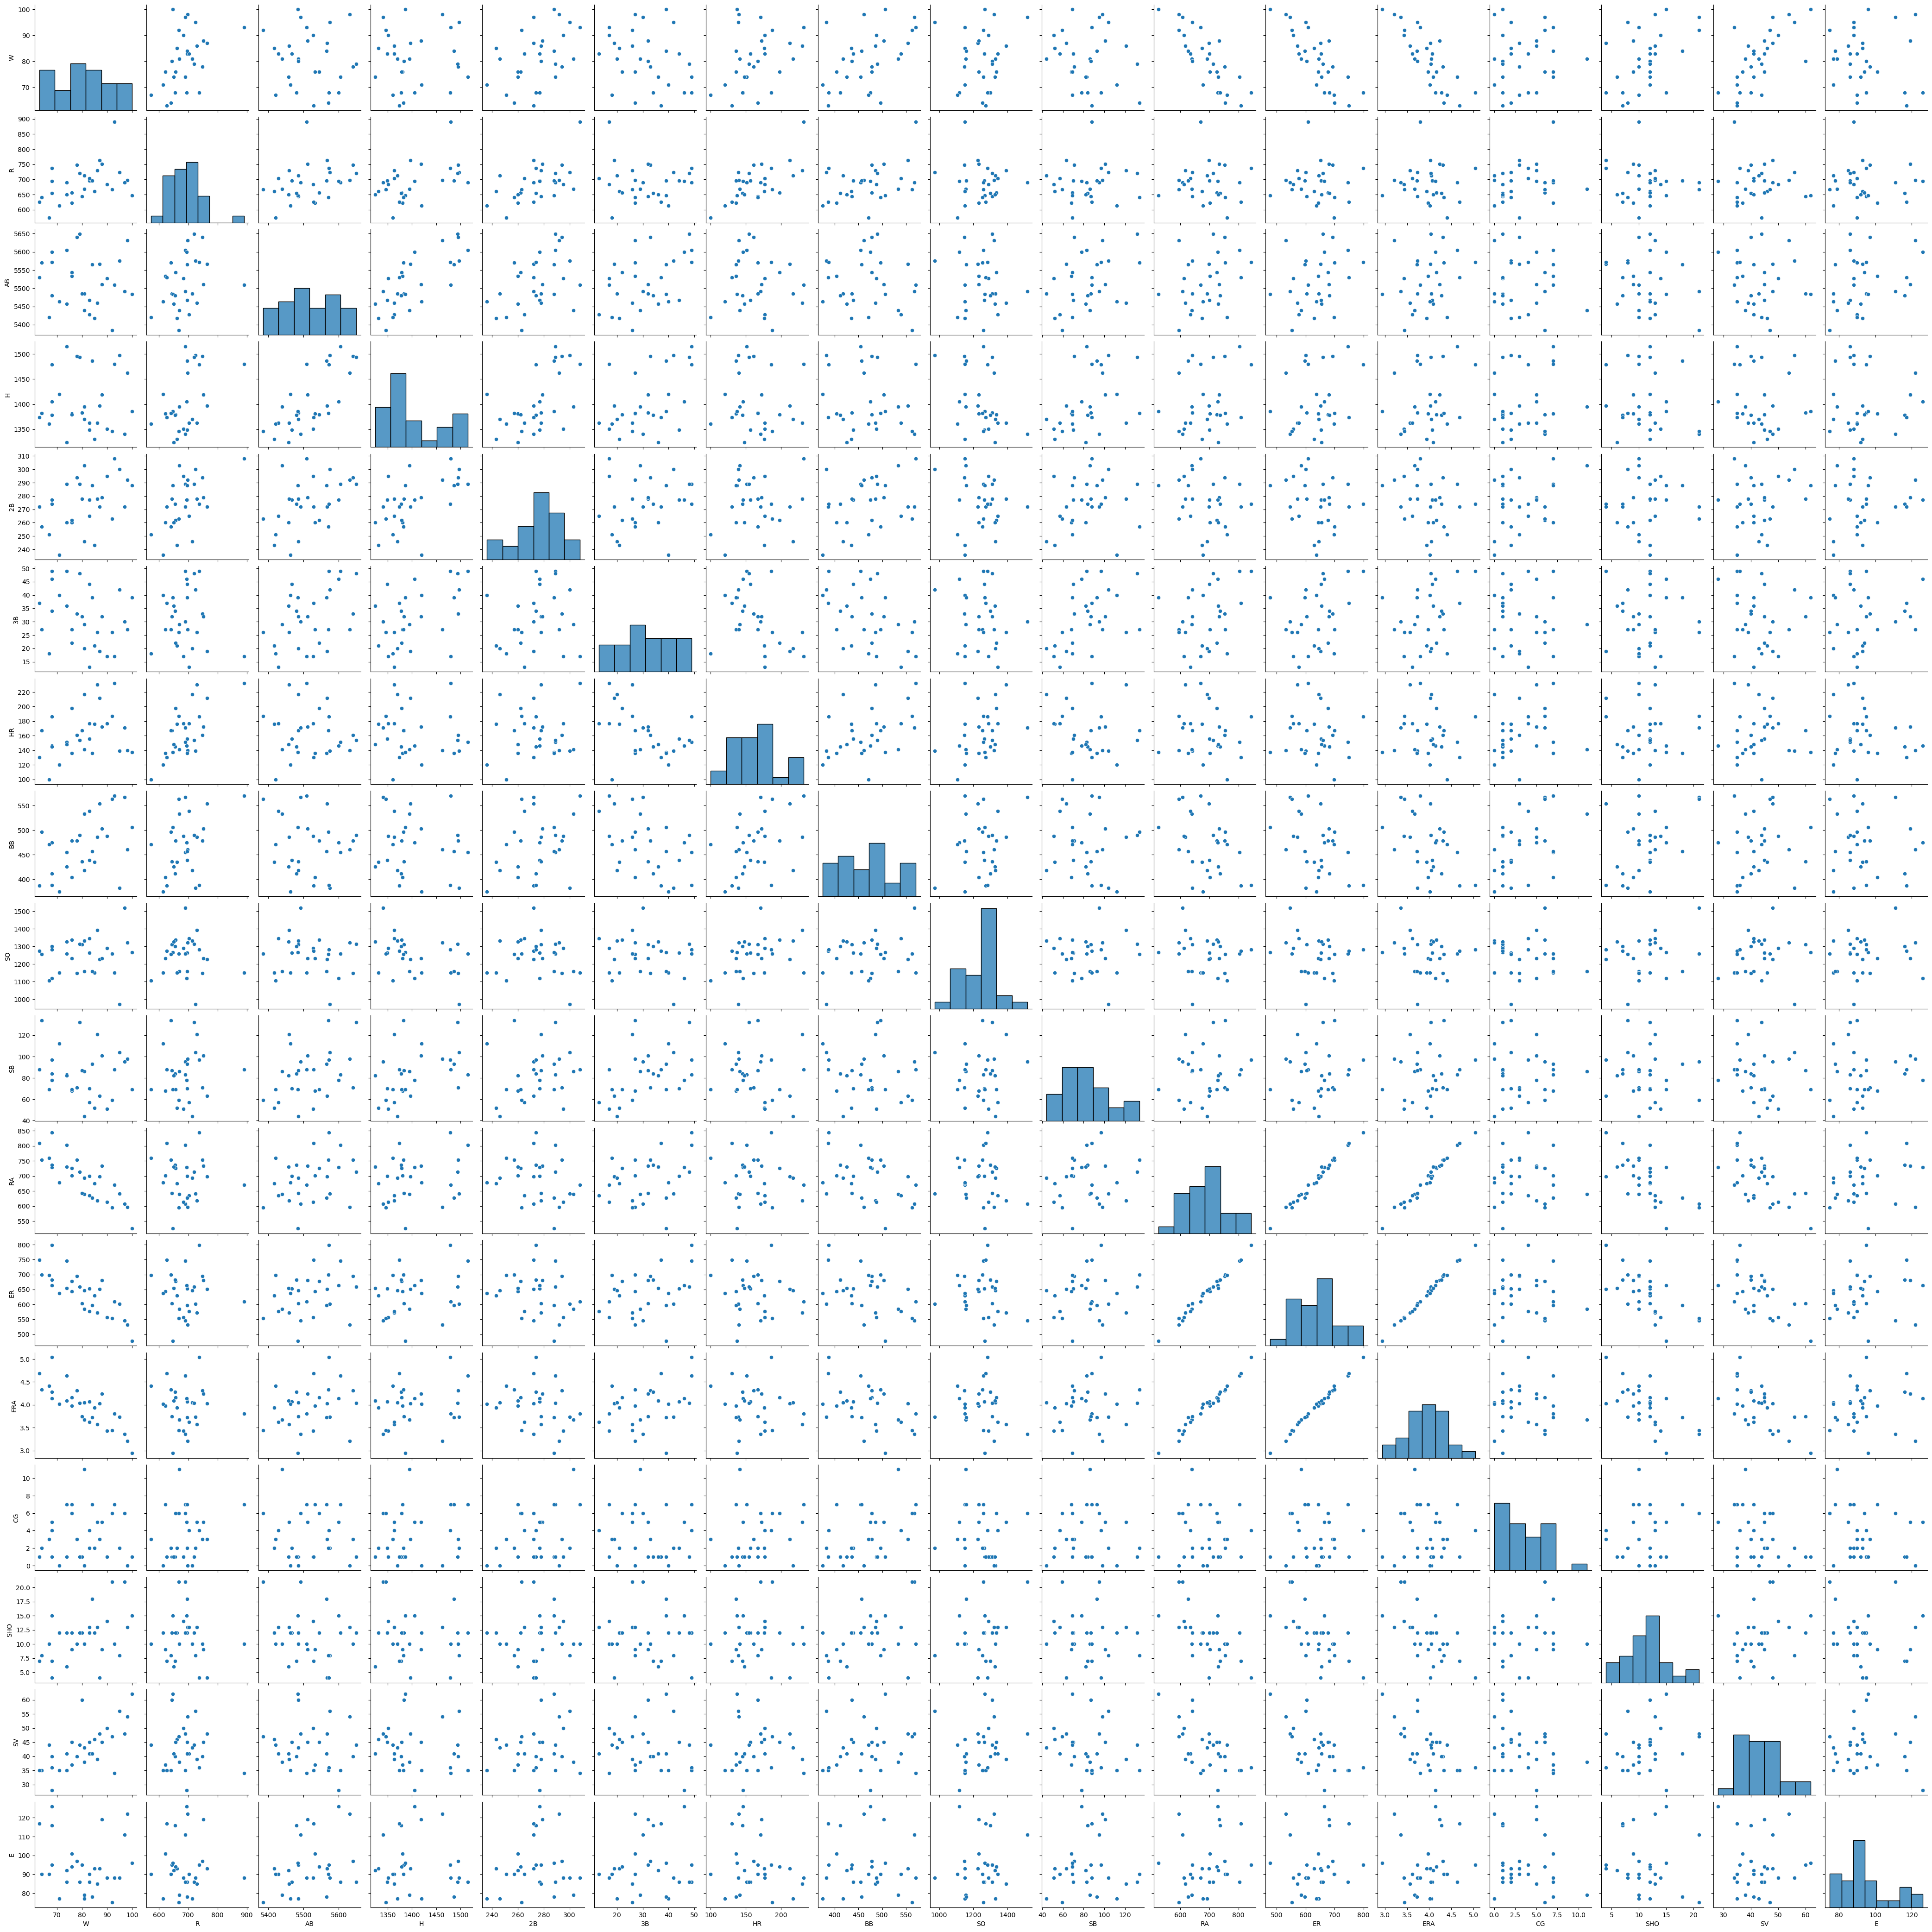

In [22]:
# Lets plot Pair plot
sns.pairplot(df)
plt.show()


Text(0.5, 1.0, 'Correlation Factors Heat Map')

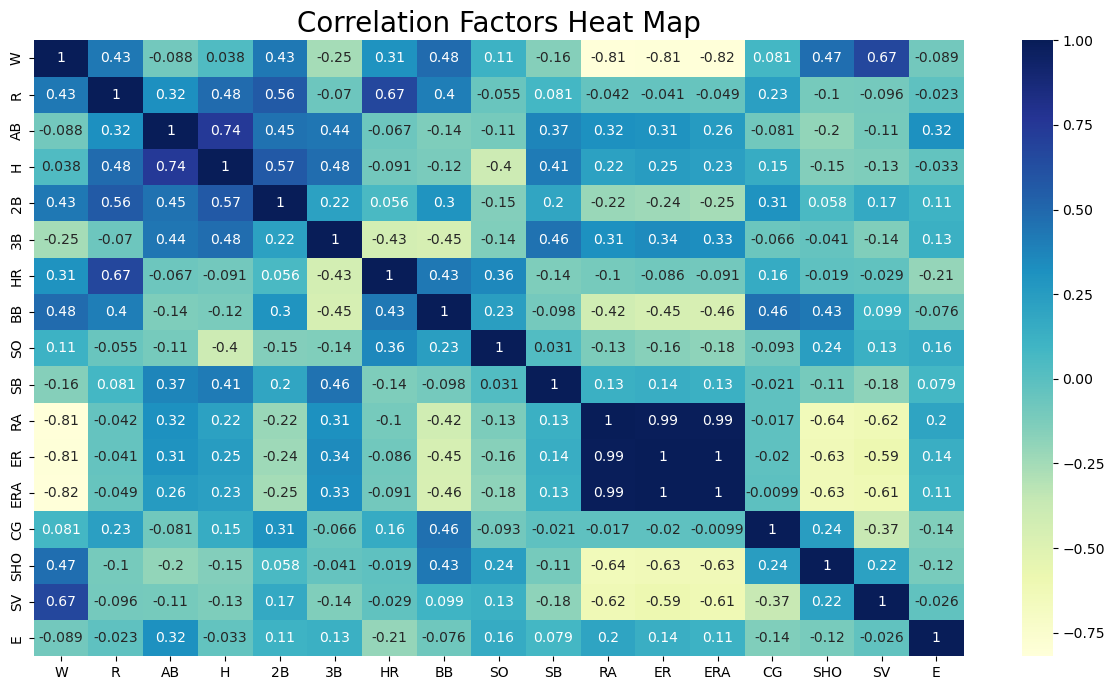

In [23]:
# Lets plot Heatmap for Corelation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

In [24]:
# Lets check Corelation of all feature with Target Column
correlation_with_quality = df.corr()['W'].abs().sort_values(ascending=False)
print(correlation_with_quality)

W      1.000000
ERA    0.819600
RA     0.812952
ER     0.809435
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
3B     0.251118
SB     0.157234
SO     0.111850
E      0.089485
AB     0.087947
CG     0.080533
H      0.037612
Name: W, dtype: float64


# Observations 
- Few columns like ERA, RA, ER highly positive corelation with W
- We can say SV, BB, SHO, R, 2B have moderate positive corelation with W
- Similarly 3B, SB, SO has weak corelation with W
- Also E, AB, CG and H has very weak or we can say very low impact on number of Wins .

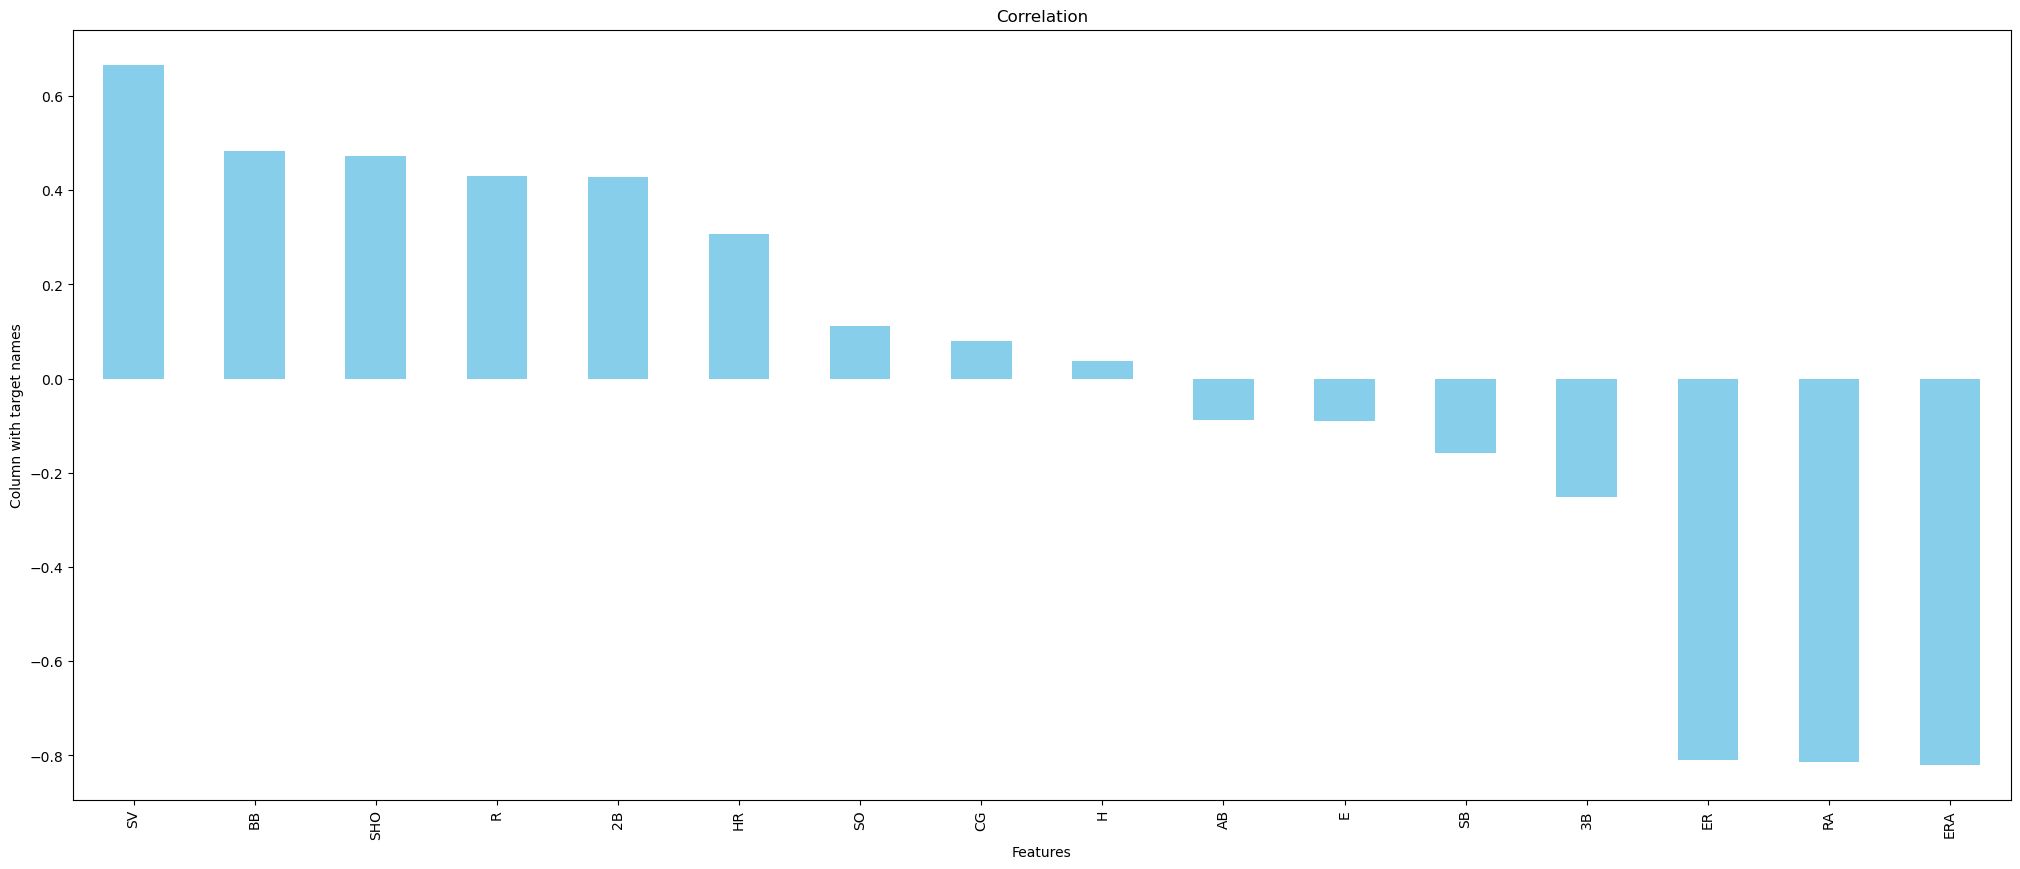

In [25]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [26]:
# lets check Corelation of Column with Column
#schecking correlation
df_corr = df.corr()
df_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [27]:
correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [28]:
features_to_drop

{'ER', 'ERA', 'RA'}

Now we see since these columns are highly corelated , thus lets drop them 

In [29]:
# dropping highly corelated columns 
df = df.drop(['ER', 'ERA', 'RA'], axis = 1)

# Data Cleaning

In [30]:
# handling outliers as we saw above 
features=df[['R','SHO','SV','E']]

In [31]:
z=np.abs(zscore(features))
df=df[(z<3).all(axis=1)]
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,5,9,45,119


# Data loss

In [32]:
initial_rows = 30
rows_after_outlier_removal = 29

loss_percentage = ((initial_rows - rows_after_outlier_removal) / initial_rows) * 100

print(f"Loss Percentage: {loss_percentage:.2f}%")

Loss Percentage: 3.33%


In [33]:
# Removing Skewness 
#list of skewed features
skewed_features = ['R','H','SV','E','HR','SHO','CG']

In [34]:
# Apply cube root transformation to the selected columns
df[skewed_features] = df[skewed_features].apply(lambda x: np.cbrt(x))


df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,8.979377,5575,11.439506,300,42,5.180101,383,973,104,1.259921,2.000000,3.825862,4.447960
1,83,8.862095,5467,11.049365,277,44,5.383213,439,1264,70,1.259921,2.289428,3.556893,4.414005
2,81,8.745985,5439,11.173556,303,29,5.204828,533,1157,86,2.223980,2.154435,3.361975,4.290840
3,76,8.536178,5533,11.136051,260,27,5.142563,404,1231,68,1.912931,2.080084,3.332222,4.657010
4,74,8.832285,5605,11.485173,289,49,5.325074,455,1259,83,1.912931,2.289428,3.271066,4.414005


Distplot for Skewed features after removing skewness

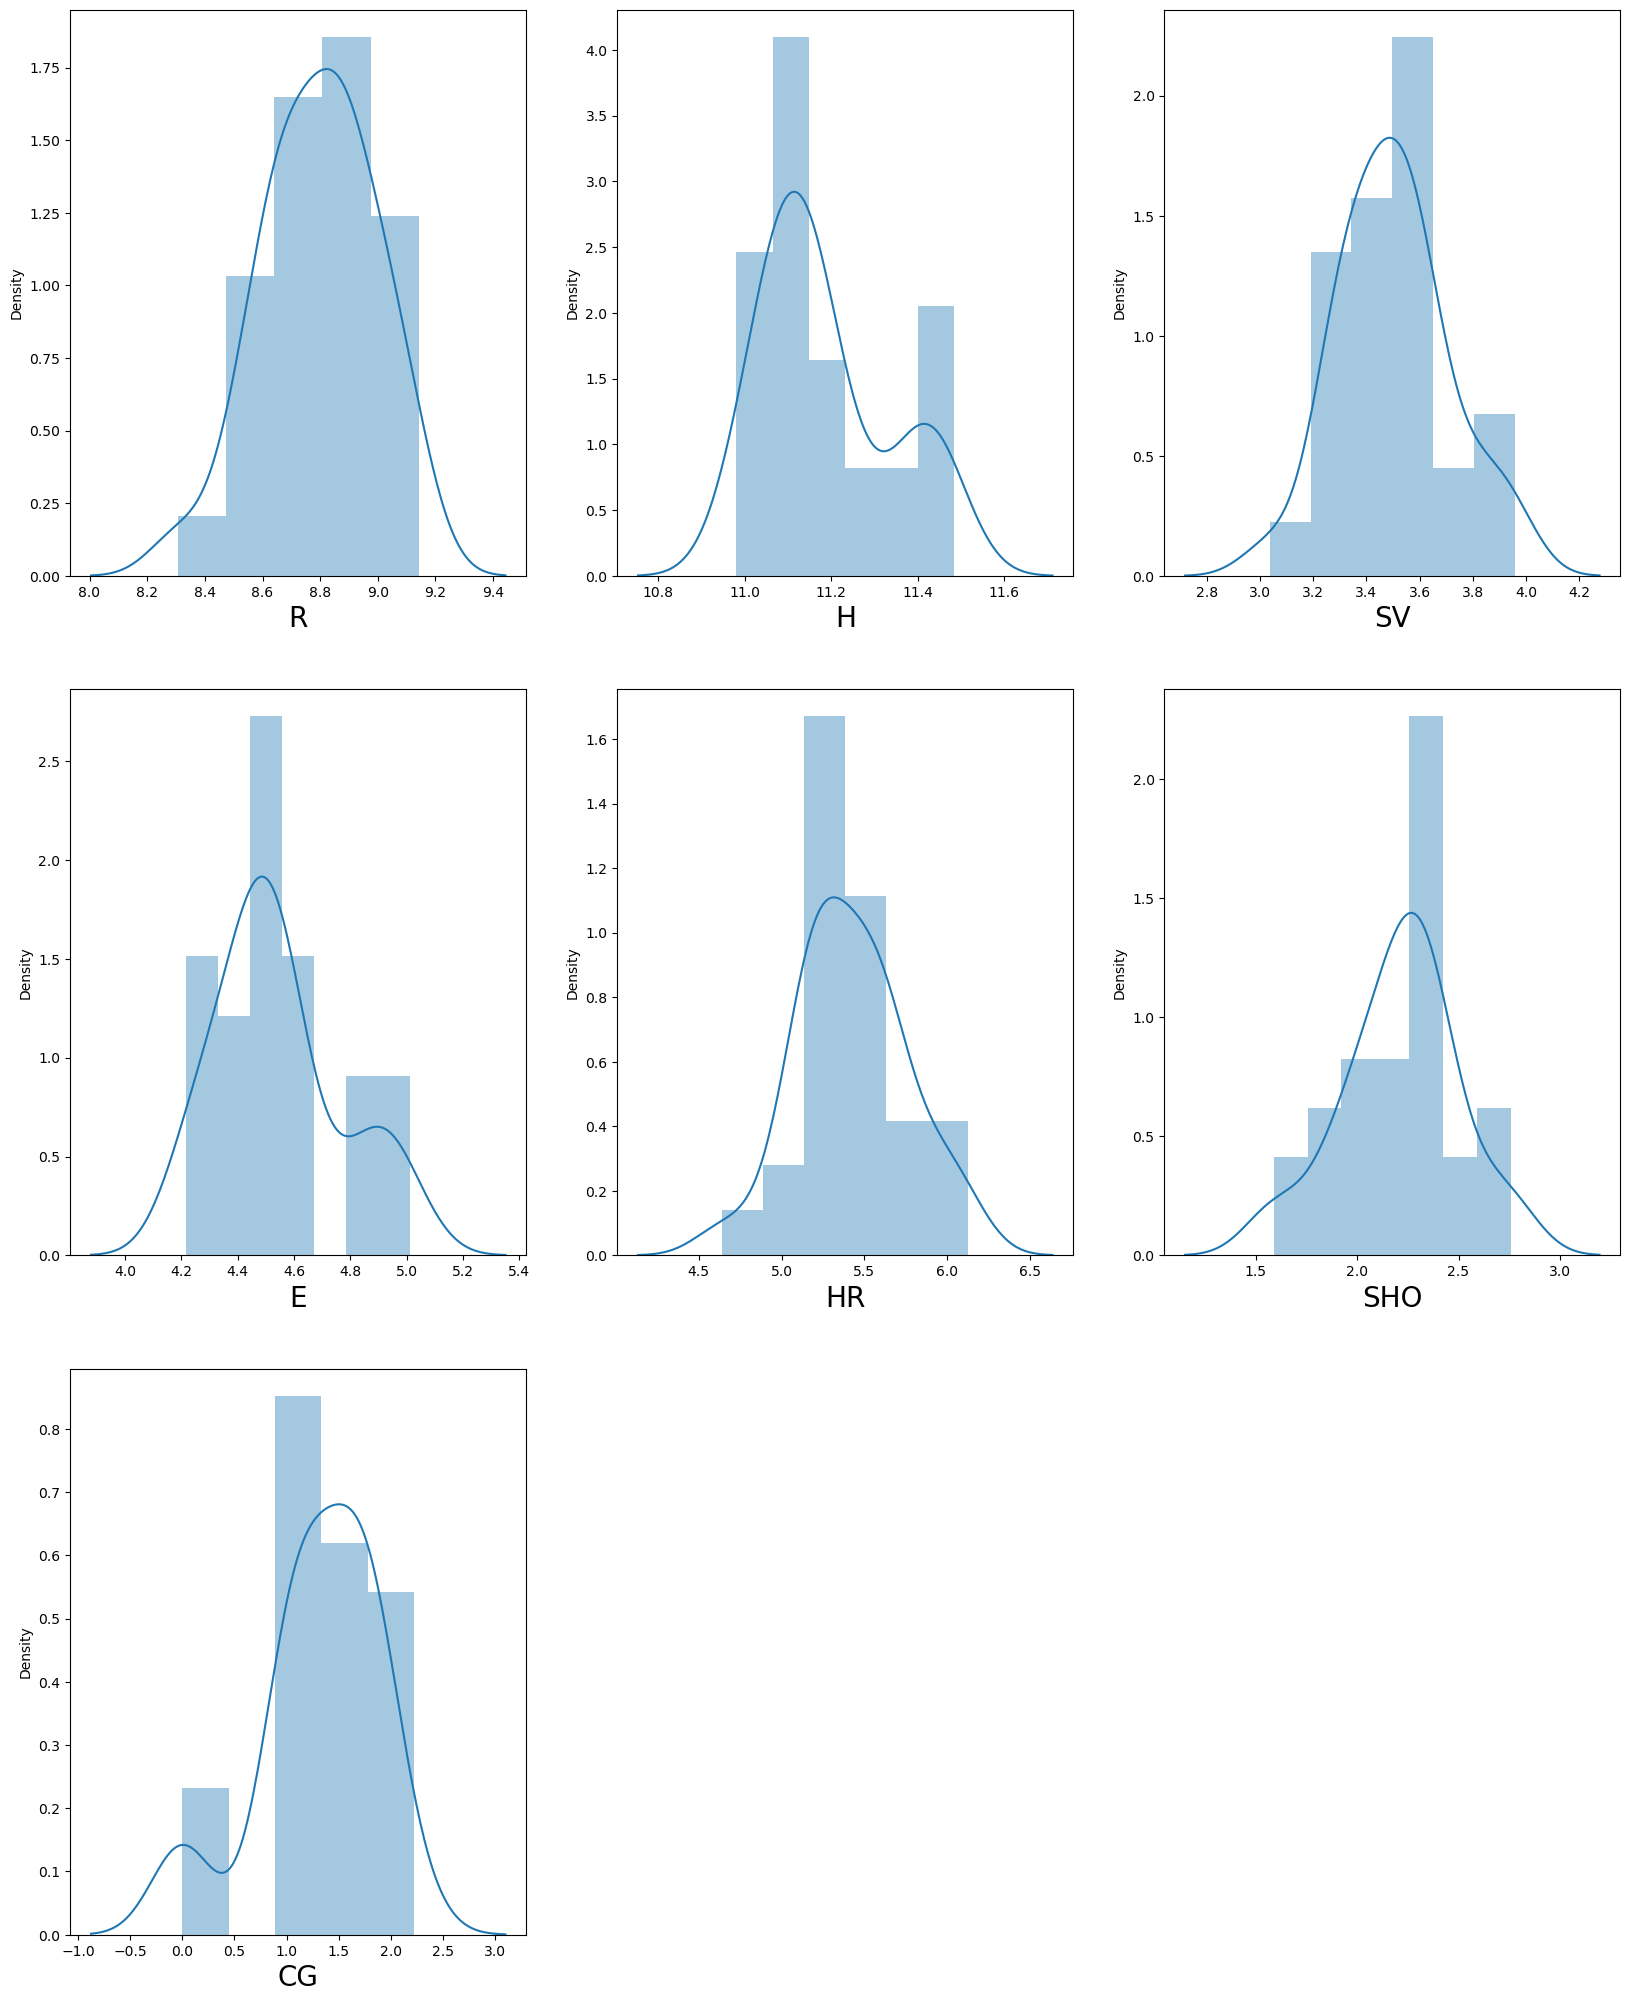

In [35]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

the distributions seems to be more closer to normal distribution 

Spliting Columns into features and labels

In [36]:
X = df.drop("W",axis=1)
y = df["W"]

In [37]:
# Scaling data using stadard scaler 
std=StandardScaler()
X = pd.DataFrame(std.fit_transform(X), columns=X.columns)

In [38]:
# Variance inflation factor 
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.343423,R
1,4.567414,AB
2,6.604754,H
3,2.989767,2B
4,2.678933,3B
5,6.410449,HR
6,3.048073,BB
7,2.266811,SO
8,1.590981,SB
9,2.247486,CG


Thus we see there is no multicolinearity

# Spliting data for training and testing 

In [39]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.8873116991381049 on Random_state 165


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=maxRS)

In [41]:
# Model evaluation 
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [42]:
models = {
        "Random Forest": RandomForestRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "SVR": SVR(),
        "Linear Regression": LinearRegression(),
        "KNeighbors Regressor": KNeighborsRegressor(),
        "SGD Regressor": SGDRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Bagging Regressor": BaggingRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
    }


trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square)

    r2_list.append(r2_square)

    print('='*35)
    print('\n')

Random Forest
Model Training Performance
RMSE: 7.09364806408824
MAE: 6.349999999999999
R2 score 0.5538052298226568


Decision Tree
Model Training Performance
RMSE: 8.459989868281674
MAE: 7.571428571428571
R2 score 0.3653637350705754


SVR
Model Training Performance
RMSE: 10.802592149277531
MAE: 9.913451133537572
R2 score -0.03476363735758148


Linear Regression
Model Training Performance
RMSE: 3.5648955978725754
MAE: 3.1719130850996526
R2 score 0.8873116991381049


KNeighbors Regressor
Model Training Performance
RMSE: 7.271077735010911
MAE: 6.857142857142855
R2 score 0.5312052117263846


SGD Regressor
Model Training Performance
RMSE: 5.055824181896178
MAE: 4.029454528311147
R2 score 0.7733430058353127


Gradient Boosting
Model Training Performance
RMSE: 7.065194930813954
MAE: 5.973936818316839
R2 score 0.5573774898462612


Bagging Regressor
Model Training Performance
RMSE: 7.198610977126074
MAE: 6.114285714285714
R2 score 0.5405030763662684


Lasso
Model Training Performance
RMSE: 5.30

We see Since Linear Regression has model accuracy of 88% seems to be best out of above .

# HyperParameter Tuning 

In [44]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False],
    'n_jobs': [None]
}

LR = LinearRegression()

grid_search = GridSearchCV(LR, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_estimator_.get_params()
best_score = grid_search.best_score_

# Create the Linear Regression model with the best parameters
best_LR = LinearRegression(**best_params)

# Fit the model on the training data
best_LR.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_LR.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression with Hyperparameter Tuning:")
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2*100)


Linear Regression with Hyperparameter Tuning:
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Squared Error (MSE): 12.708480623731266
R-squared (R2): 88.73116991381049


We See R2 Score is same as previous 

# Best Fit Line 

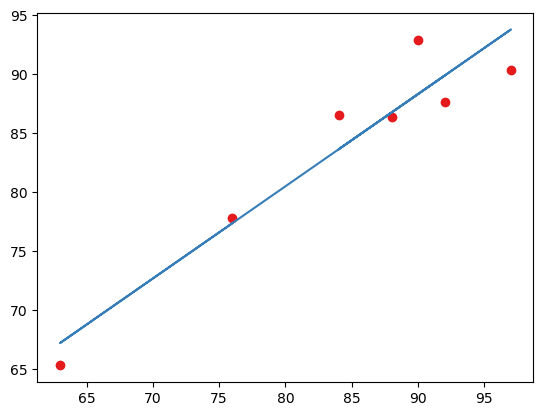

In [45]:
palette = "Set1"
sns.set_palette(palette)
plt.plot(y_test,y_pred,'o')
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)
plt.show()

# Saving Model 

In [46]:
filename = 'best_model.pkl'
pickle.dump(LR, open(filename, 'wb'))